**Introduction**

In the new-generation lifestyle industry, Hunter's e-grocery is a well-known name. With a presence in ten different countries, the company continually seeks new ways to better meet its customers' needs. In the past few years, swan events such as Covid-19, the Ukraine crisis, and the gas shortage have all impacted the purchasing behavior of clients. Based on the characteristics of our customers' purchasing behaviors, we will develop a business value proposition for predictive marketing using principal component analysis for dimensionality reduction.

In this research, predictive behvioral dataset will be used from Hunter's supermarket. The data was published in Kaggle and it can be download via this link https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023

Hypothesis: 


*   Hypothesis 1: Time pressure and unfamiliar stores prevent customers from purchasing the products intended.A search based on external memory is limited by time pressure, which leads to a trade-off between speed and accuracy.  
*   Hypothesis 2:  Purchase volume deliberation due to familiarity with the store and lack of time pressure.In order to make a purchase decision, cognitive resources are allocated to the purchase volume search, which is guided by internal memory. Using the t-test for analysis of the data, it was predicted that consumers who shop under conditions of high store knowledge and no time pressure are more likely to engage in purchase volume deliberation. The focus will be on this hypothesis.





**Business Perspective**

This study aims to determine how Hunter's supermarket can evolve or re-invent its brand to increase mindshare and product sales from a business perspective

**Data Explanation**

The dataset consists of over 2 million purchase records at a renowned Hunter's supermarket. 
Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :



*   order_id – A unique number to identity the order

*   user_id - A unique number to identify the user
*   order_number – Number of the order
*   order_dow – Day of the Week the order was made
*   order_hour_of_day – Time of the order
*   days_since_prior_order - History of the order
*   product_id – Id of the product
*   add_to_cart_order – Number of items added to cart
*   reordered – If the reorder took place
*   department_id - Unique number allocated to each department
*   department – Names of the departments
*   product_name – Name of the products














**Importing Data From Kaggle**


1.   Kaggle API was downloaded



2. Mount to Google Drive

>      The Kaggle API was downloaded in the Google drive and Google drive was connected to Colab





In [ ]:
!pip install kaggle #after downloading the API , install Kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle #Make a directory named “.kaggle”

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json # Copy the “kaggle.json” into this new directory

In [ ]:
! kaggle datasets download -d hunter0007/ecommerce-dataset-for-predictive-marketing-2023 #Downloading Dataset

 86% 13.0M/15.2M [00:01<00:00, 17.9MB/s]
100% 15.2M/15.2M [00:01<00:00, 14.8MB/s]


In [ ]:
!unzip ecommerce-dataset-for-predictive-marketing-2023 #unzip the file

Archive:  ecommerce-dataset-for-predictive-marketing-2023.zip
  inflating: ECommerce_consumer behaviour.csv  


** **IMPORTING PACKAGES**

In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# install phik 
import sys

!"{sys.executable}" -m pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 25.5 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


**LOAD THE DATA**

In [ ]:
df = pd.read_csv("ECommerce_consumer behaviour.csv")

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [ ]:
df.info() #prints the infomartion about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
df.isnull().sum() #returns the number of missing values in the dataset.

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [ ]:
df.nunique() #returns the number of unique values for each column

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [ ]:
df.describe() #displays summary statistics

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2019501.00000,2019501.00000,2019501.00000,2019501.00000,2019501.00000,1895159.00000,2019501.00000,2019501.00000,2019501.00000,2019501.00000
mean,1707012.76245,103067.26570,17.15138,2.73537,13.43948,11.38603,71.20590,8.36317,0.58974,9.92835
std,985983.19623,59491.16507,17.52576,2.09388,4.24101,8.97098,38.20727,7.15006,0.49188,6.28293
min,10.00000,2.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000
25%,852649.00000,51584.00000,5.00000,1.00000,10.00000,5.00000,31.00000,3.00000,0.00000,4.00000
50%,1705004.00000,102690.00000,11.00000,3.00000,13.00000,8.00000,83.00000,6.00000,1.00000,9.00000
75%,2559031.00000,154600.00000,24.00000,5.00000,16.00000,15.00000,107.00000,11.00000,1.00000,16.00000
max,3421080.00000,206209.00000,100.00000,6.00000,23.00000,30.00000,134.00000,137.00000,1.00000,21.00000


In [ ]:
df['add_to_cart_order'].mean()

8.363173377978026

## **The number of orders that users have made**

In [ ]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


In [ ]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

In [ ]:
df['order_number_group']=df['order_number'].apply(order_number_group)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc2422b970>],
      dtype=object)

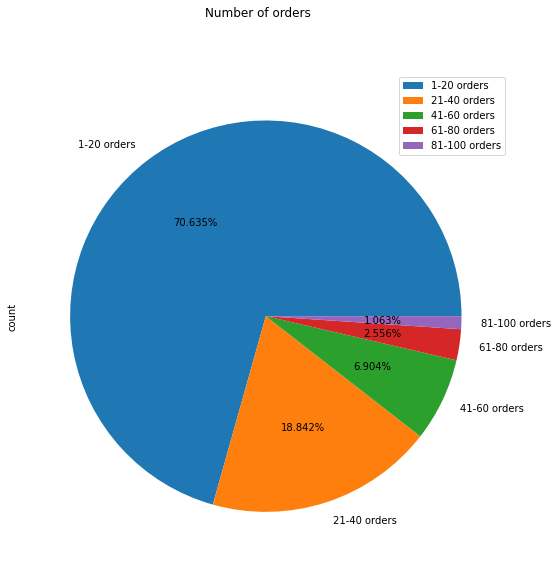

In [ ]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Number of orders',figsize=(9,9))

## **Products users add to the cart**





In [ ]:
atco_u=df.groupby('add_to_cart_order',as_index=False).agg({'user_id': 'count'}).sort_values(by='user_id',ascending=False)

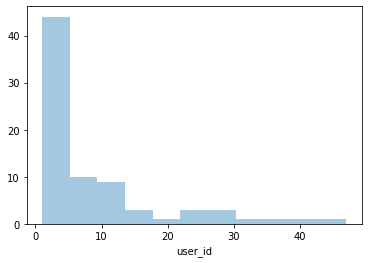

In [ ]:
sns.distplot(atco_u.query('user_id<50').user_id, kde=False)

### **Products were added to the cart**

In [ ]:
on_atco=df.groupby('order_number',as_index=False).agg({'add_to_cart_order': 'count'}).sort_values(by='add_to_cart_order',ascending=False)

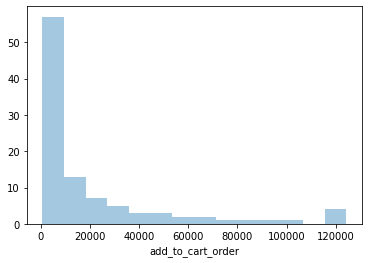

In [ ]:
sns.distplot(on_atco.add_to_cart_order, kde=False)

### **The time when the order was made by day and time of day**

In [ ]:
df['days_since_prior_order']=df['days_since_prior_order'].fillna('0')

In [ ]:
df['days_since_prior_order']=df['days_since_prior_order'].astype(int)

In [ ]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

,order_hour_of_day,user_id
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
...,...,...
1,1,7283
5,5,5732
2,2,4210
4,4,3269


In [ ]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x

In [ ]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)

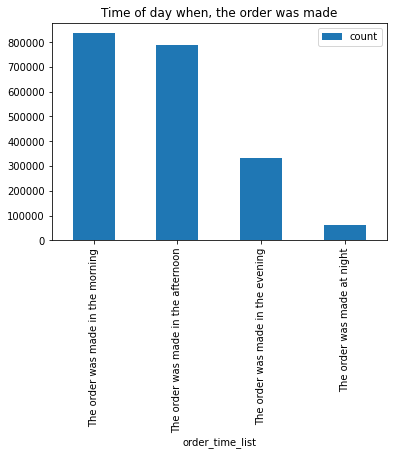

In [ ]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='Time of day when, the order was made')

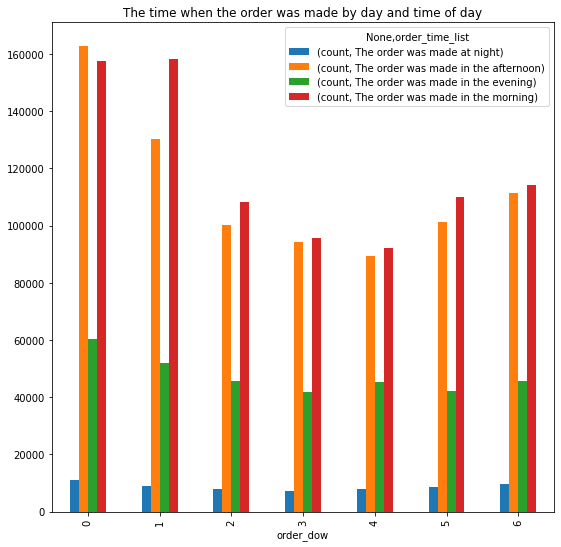

In [ ]:
df.pivot_table(index='order_dow',columns='order_time_list',values='user_id',aggfunc=['count']).plot(kind='bar',title='The time when the order was made by day and time of day',figsize=(9,9))

**Hypothesis testing**

H0: Purchase volume deliberation not due to familiarity with the store and to lack of time pressure μ0 = μ1

H1: Purchase volume deliberation is due to to familiarity with the store and to lack of time pressure. μ0 <> μ1


In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 100)
pd.set_option('display.float_format', '{:.5f}'.format)

## **Split up the dataset**

In [ ]:

order_early = df[(df['order_hour_of_day'] == 7)]
order_early.info()
order_late = df[(df['order_hour_of_day'] == 16)]
order_late.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54143 entries, 524 to 2017846
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                54143 non-null  int64  
 1   user_id                 54143 non-null  int64  
 2   order_number            54143 non-null  int64  
 3   order_dow               54143 non-null  int64  
 4   order_hour_of_day       54143 non-null  int64  
 5   days_since_prior_order  51391 non-null  float64
 6   product_id              54143 non-null  int64  
 7   add_to_cart_order       54143 non-null  int64  
 8   reordered               54143 non-null  int64  
 9   department_id           54143 non-null  int64  
 10  department              54143 non-null  object 
 11  product_name            54143 non-null  object 
dtypes: float64(1), int64(9), object(2)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158247 entries, 22 to 2019383
Dat

## **Plot our variables**

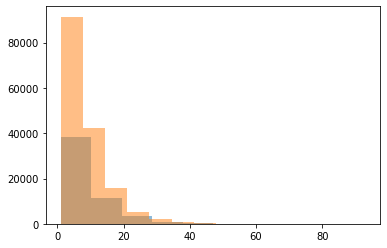

DescribeResult(nobs=54143, minmax=(1, 93), mean=8.514988087102672, variance=55.36200338309106, skewness=2.1120175437235846, kurtosis=8.696989759237587)
DescribeResult(nobs=158247, minmax=(1, 68), mean=8.196553489165671, variance=48.59510129970419, skewness=1.730449629747011, kurtosis=4.375861585090108)


In [ ]:

plt.hist(order_early['add_to_cart_order'], alpha = .5) #highest
plt.hist(order_late['add_to_cart_order'], alpha = .5)  #lowest
plt.show()

print(stats.describe(order_early['add_to_cart_order']))
print(stats.describe(order_late['add_to_cart_order']))


## **Conduct the t-test**

In [ ]:

stats.ttest_ind(order_early['add_to_cart_order'], order_late['add_to_cart_order'])

Ttest_indResult(statistic=9.016153044038488, pvalue=1.9636839355222203e-19)

## **Confidence interval**

In [ ]:

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(order_early['add_to_cart_order'], order_late['add_to_cart_order']))

# What is the current average sales in the evening?

print(order_late["add_to_cart_order"].mean())

The difference in means at the 95% confidence interval (two-tail) is between -0.3899033684500056 and -0.24696582742399664.
8.196553489165671


## **Pointplot to compare the means**

[[Text(0, 0, 'order_early'), Text(0, 0, 'order_late')]]

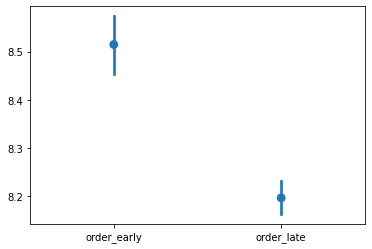

In [ ]:
g = sns.pointplot(data=[order_early['add_to_cart_order'], order_late['add_to_cart_order']], join=False)
                        
g.set(xticklabels = ['order_early', 'order_late'])

## **Conclusion**

This study demonstrates that consumer's time availibitty affect store shopping decisions.Time pressure primarily had an effect on frequency of failure to make intended purchases. The findings of this study shows that purchases arre higher early morning comparing to the evening. From the business's perspective the supermarket should invest more resources to morning staff to increase sales.